# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, March 1, 2017

In [1]:
import sys
import numpy as np
from pprint import pprint as pp
import random
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

np.random.seed(12345)

## 1. Data

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='/Users/KexinHuang/Desktop/class/ML hw/hw3') # Give an appropriate custom path

K = 10
D = 784

In [3]:
print (len(mnist['target']))
print (len(mnist['data']))

70000
70000


In [4]:
all_data = mnist['data']
all_labels = np.array([int(d) for d in mnist['target']])

In [5]:
# Class distribution
pd.DataFrame({'count': np.bincount(all_labels), 'digit': range(10)}, columns=['digit', 'count'])

,digit,count
0,0,6903
1,1,7877
2,2,6990
3,3,7141
4,4,6824
5,5,6313
6,6,6876
7,7,7293
8,8,6825
9,9,6958


In [6]:
# Sampling data
num_train, num_valid, num_test = 1000, 100, 100
num_total = num_train + num_valid + num_test

sample_idx = np.random.choice(all_data.shape[0], num_total)
(train_idx, valid_idx, test_idx) = (sample_idx[:num_train], 
                                    sample_idx[num_train:num_train+num_valid],
                                    sample_idx[-num_test:])
print ("{} train | {} valid | {} test".format(len(train_idx), len(valid_idx), len(test_idx)))

train_data, train_labels = all_data[train_idx], all_labels[train_idx]
valid_data, valid_labels = all_data[valid_idx], all_labels[valid_idx]
test_data, test_labels = all_data[test_idx], all_labels[test_idx]

1000 train | 100 valid | 100 test


9
7
7
9
1


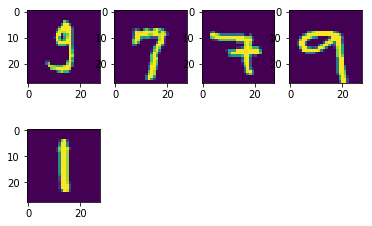

In [7]:
# Let's see how the digits look

j = 1
for i in random.sample(range(0, len(train_data)), 5):
    plt.subplot(2, 4, j)
    plt.imshow(train_data[i].reshape((28, 28)))
    print (train_labels[i])
    j += 1


In [8]:
print (train_data.shape, train_labels.shape)

(1000, 784) (1000,)


In [9]:
print (np.bincount(train_labels))

[ 88  95 124 118  99  82  93 103  97 101]


In [10]:
train_labels[0]

0

## 2. Model - SKLearn 

In [12]:
# TODO : import correct model from SKLearn
# uncomment the following and fix it
from sklearn.linear_model import LogisticRegression as lg

In [13]:
# TODO : use the correct model with correct hyperparameters
# uncomment the following and fix it
model = lg(multi_class='multinomial',solver='newton-cg')

In [14]:
# TODO : train the model with training data
# uncomment the following and fix it

res=model.fit(train_data,train_labels)

In [15]:
res

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
res.intercept_

array([ 0.02855739,  0.15519305, -0.14931111, -0.11616593, -0.02757333,
        1.42055563, -0.14704969,  0.95273432, -1.65811641, -0.45882392])

## 3. Feature Coefficients

In [18]:
# TODO : print the shape of the learned weights & bias.
# uncomment the following and fix it

weight = res.coef_
bias = res.intercept_

print ("Weight:", weight.shape)
print ("Bias:", bias.shape)

Weight: (10, 784)
Bias: (10,)


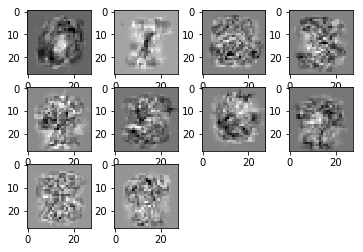

In [19]:
# visualize the weights
# uncomment the following 

plt.figure()

for ii in range(weight.shape[0]):
    plt.subplot(3, 4, ii+1)
    plt.imshow(weight[ii,:].reshape(28, 28), cmap=cm.gray_r)

plt.show()

## 4. Test Learned Weights

In [20]:
# TODO : test the learned weights on a validation set
# uncomment the following and fix it

valid_pred = model.predict(valid_data)

right = np.sum(valid_pred == valid_labels)
acc = right / len(valid_pred)

print ("Validation accuracy: {}".format(acc))

Validation accuracy: 0.92
